Mục tiêu của bài thực hành cho thấy việc lựa chọn tham số đầu vào ảnh hưởng ra sao đến kết quả thu được.   
Để bắt đầu, ta khai báo các thư viện:

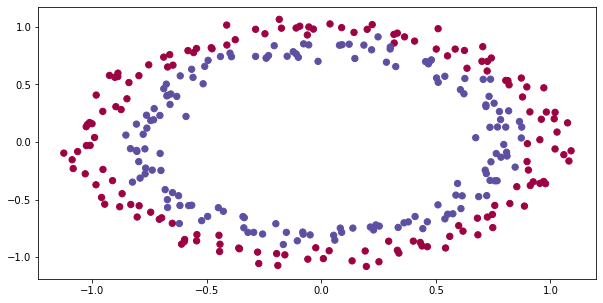

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = load_dataset()

Bạn sẽ phân loại chấm màu đỏ và màu xanh ở trên.   
Tôi sẽ dùng mạng Neural Network 3 lớp, các hàm được sử dụng từ file init_utils.py.      
Khi khoi tạo tham số ban đầu, tôi sẽ sử dụng 3 khai báo:  
1. Khởi tạo với các tham số = 0   
2. Khởi tạo ngẫu nhiên, nhưng để các tham số lớn.   
3. Khởi tạo tham số ngẫu nhiên, nhưng theo cách đã trình bày trong mục 1.cong_thuc_....    

In [ ]:
1. Khởi tạo các tham số = 0

In [2]:
def tham_so_ban_dau_0(so_not_tung_layer):
    parameters = {}
    L = len(so_not_tung_layer)
    for l in range(1,L):
        parameters['W' + str(l)] = np.zeros((so_not_tung_layer[l], so_not_tung_layer[l - 1] ))
        parameters['b' + str(l)] = np.zeros((so_not_tung_layer[l], 1))
    return parameters

In [ ]:
2. Khởi tạo các tham số ngẫu nhiên, nhưng để các tham số lớn:

In [3]:
def tham_so_ban_dau_lon(so_not_tung_layer):
    np.random.seed(1)   
    parameters = {}
    L = len(so_not_tung_layer)
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(so_not_tung_layer[l], so_not_tung_layer[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((so_not_tung_layer[l], 1))
    return parameters

In [ ]:
3. Khởi tạo các tham số nhỏ theo cách trình bày 1.cong_thuc....

In [4]:
def tham_so_ban_dau_chuan(so_not_tung_layer):
    np.random.seed(1)   
    parameters = {}
    L = len(so_not_tung_layer) -1
    for l in range(1,L +1):
        parameters['W' + str(l)] = np.random.randn(so_not_tung_layer[l], so_not_tung_layer[l - 1] ) * np.sqrt(2./ so_not_tung_layer[l-1])
        parameters['b' + str(l)] = np.zeros((so_not_tung_layer[l], 1))
    return parameters

In [ ]:
4. Mô hình:

In [5]:
def model(X, Y, learning_rate = 0.005, num_iterations = 15000, print_cost = True, initialization = "tham_so_ban_dau_0"):

    grads = {}
    costs = []
    m = X.shape[1]
    so_not_tung_layer = [X.shape[0], 13, 7, 1]

    if initialization == "tham_so_ban_dau_0":
        parameters = tham_so_ban_dau_0(so_not_tung_layer)
    elif initialization == "tham_so_ban_dau_lon":
        parameters = tham_so_ban_dau_lon(so_not_tung_layer)
    elif initialization == "tham_so_ban_dau_chuan":
        parameters = tham_so_ban_dau_chuan(so_not_tung_layer)


    for i in range(0, num_iterations):

        #Truyền xuôi
        a3, cache = forward_propagation(X, parameters)
        
        # hàm mất mát
        cost = compute_loss(a3, Y)

        # Truyền ngược
        grads = backward_propagation(X, Y, cache)
        
        # Cập nhật tham số
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # In kết quả
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
Xem kết quả:
1. Tham số khởi tạo = 0

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599453
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


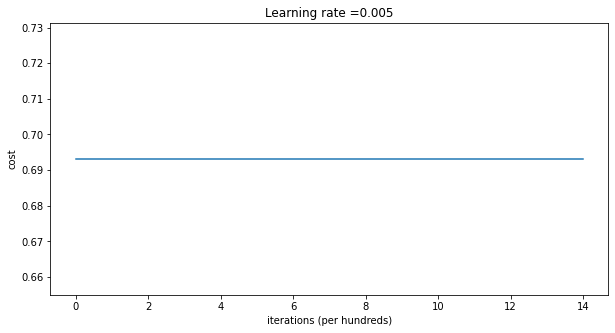

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [6]:
parameters = model(train_X, train_Y, initialization = "tham_so_ban_dau_0")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

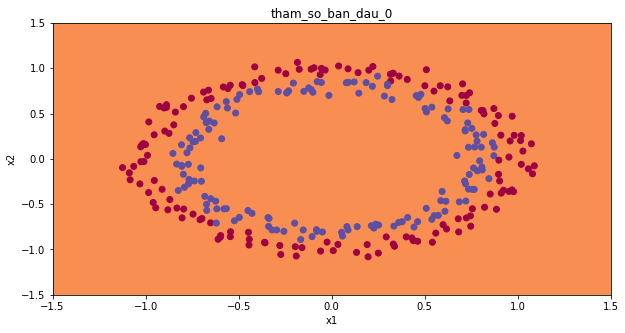

In [7]:
plt.title("tham_so_ban_dau_0")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [ ]:
2. Tham số khởi tạo lớn

Cost after iteration 0: inf
Cost after iteration 1000: 0.5427243786960676
Cost after iteration 2000: 0.2871266158043913
Cost after iteration 3000: 0.17944868178155804
Cost after iteration 4000: 0.1647818008877412
Cost after iteration 5000: 0.1542017405219062
Cost after iteration 6000: 0.1501922691492825
Cost after iteration 7000: 0.1482322501174142
Cost after iteration 8000: 0.14654753204945659
Cost after iteration 9000: 0.14511001490804443
Cost after iteration 10000: 0.14375175067022977
Cost after iteration 11000: 0.14236937674681013
Cost after iteration 12000: 0.14089465579155053
Cost after iteration 13000: 0.1394264184463658
Cost after iteration 14000: 0.1379649791420828


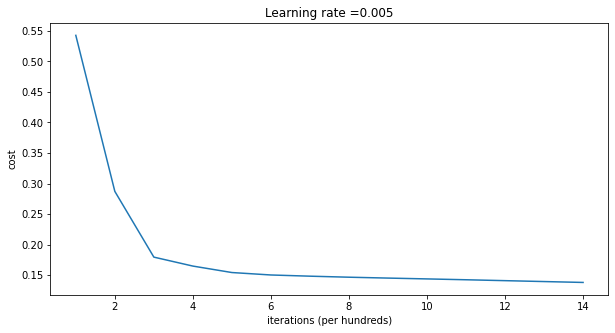

On the train set:
Accuracy: 0.9833333333333333
On the test set:
Accuracy: 0.94


In [9]:
parameters = model(train_X, train_Y, initialization = "tham_so_ban_dau_lon")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

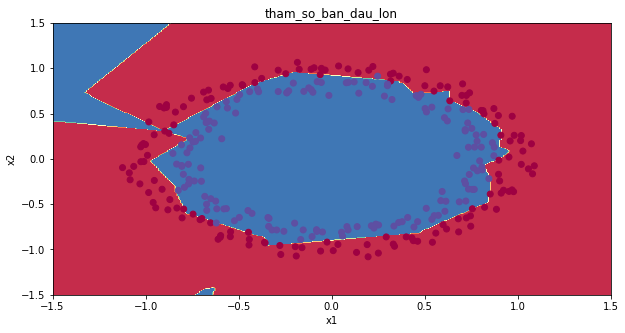

In [10]:
plt.title("tham_so_ban_dau_lon")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

3. Khởi tạo tham số chuẩn

Cost after iteration 0: 0.7279916458314409
Cost after iteration 1000: 0.6929115471070433
Cost after iteration 2000: 0.682133888040397
Cost after iteration 3000: 0.6716765612476558
Cost after iteration 4000: 0.6572316881537487
Cost after iteration 5000: 0.6390216957622028
Cost after iteration 6000: 0.6120705443386956
Cost after iteration 7000: 0.5741978499159287
Cost after iteration 8000: 0.5190800666634469
Cost after iteration 9000: 0.4458622758369988
Cost after iteration 10000: 0.3673246494519492
Cost after iteration 11000: 0.29612739716865955
Cost after iteration 12000: 0.23936206339843627
Cost after iteration 13000: 0.19580683252766584
Cost after iteration 14000: 0.16091265457653212


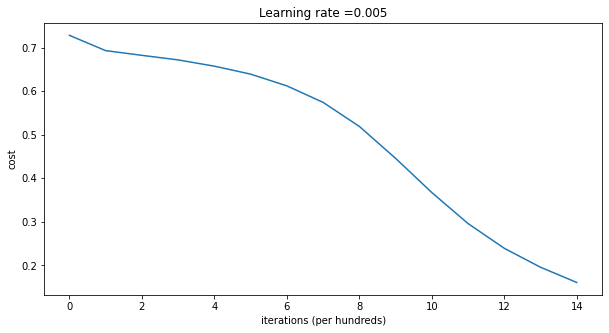

On the train set:
Accuracy: 0.98
On the test set:
Accuracy: 0.96


In [11]:
parameters = model(train_X, train_Y, initialization = "tham_so_ban_dau_chuan")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

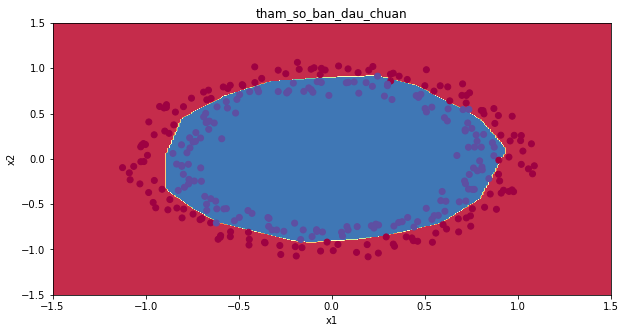

In [12]:
plt.title("tham_so_ban_dau_chuan")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [13]:
Kết luận rút ra khi sử dụng 3 cách khởi tạo tham số:   
<img src = 'https://i.imgur.com/VGUTAby.png'>  
- Việc khai báo tham số ảnh hưởng đến kết quả thu được của mô hình   
- Khởi tạo tham số = 0 có khi khiến mô hình trở nên vô nghĩa   
- Khởi tạo tham số lớn có thể dẫn đến giảm độ chính xác thu được khi đào tạo mô hình.  
- Sử dụng tham số khởi tạo thích hợp giúp mô hình thu được kết quả tốt


SyntaxError: invalid syntax (<ipython-input-13-71e77a6fbbc0>, line 1)